# Imports

In [2]:
import numpy as np
from numpy.random import seed

seed(1)
import matplotlib.pyplot as plt
import pandas as pd
import string
import os
import shutil
import re

# tensorflow = library specializing in neural networks
import tensorflow as tf

# keras = python interface for neural networks
# runs on top of tensorflow (tensorflow is backend)
# more use friendly

from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding
from tensorflow.keras.layers import TextVectorization
from keras.optimizers import Adam

from sklearn.linear_model import LinearRegression

---

# Generate Training Data

In [3]:
# generate sequence
sequence = np.array(list(range(10))).astype(float)

In [4]:
sequence

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [5]:
# number of training words
window_size = 3

In [6]:
# generate training data
train_data = [
    np.array(sequence[i : i + window_size]).reshape(1, -1)
    for i in range(sequence.shape[0] - window_size)
]
train_data = np.concatenate(train_data * 10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [7]:
train_data.shape

(70, 3, 1)

In [8]:
train_data[:3]

array([[[0.],
        [1.],
        [2.]],

       [[1.],
        [2.],
        [3.]],

       [[2.],
        [3.],
        [4.]]])

In [9]:
# get training labels
train_label = [
    sequence[i + window_size] for i in range(sequence.shape[0] - window_size)
]
train_label = np.concatenate([train_label] * 10).reshape(-1, 1)

In [10]:
train_label[:3]

array([[3.],
       [4.],
       [5.]])

# Train Model

In [11]:
# init model
model = Sequential()

# RNN
model.add(SimpleRNN(1, activation="linear"))

# compile model
opt = Adam(learning_rate=1)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mse"])

# train model
model.fit(train_data, train_label, epochs=100, verbose=1)

2022-11-15 00:47:47.427011: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2022-11-15 00:47:47.427077: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/100
3/3 [==============================] - 3s 7ms/step - loss: 60.5196 - mse: 60.5196
Epoch 2/100
3/3 [==============================] - 0s 4ms/step - loss: 115.6184 - mse: 115.6184
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 18.6430 - mse: 18.6430
Epoch 4/100
3/3 [==============================] - 0s 3ms/step - loss: 3.2210 - mse: 3.2210
Epoch 5/100
3/3 [==============================] - 0s 4ms/step - loss: 19.4650 - mse: 19.4650
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 25.2615 - mse: 25.2615
Epoch 7/100
3/3 [==============================] - 0s 4ms/step - loss: 10.1116 - mse: 10.1116
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 0.8743 - mse: 0.8743
Epoch 9/100
3/3 [==============================] - 0s 3ms/step - loss: 2.9697 - mse: 2.9697
Epoch 10/100
3/3 [==============================] - 0s 3ms/step - loss: 5.9855 - mse: 5.9855
Epoch 11/100
3/3 [==============================] - 0s 3ms/step -

3/3 [==============================] - 0s 4ms/step - loss: 6.6119e-10 - mse: 6.6119e-10
Epoch 86/100
3/3 [==============================] - 0s 3ms/step - loss: 1.4979e-10 - mse: 1.4979e-10
Epoch 87/100
3/3 [==============================] - 0s 4ms/step - loss: 3.2156e-10 - mse: 3.2156e-10
Epoch 88/100
3/3 [==============================] - 0s 5ms/step - loss: 5.7553e-11 - mse: 5.7553e-11
Epoch 89/100
3/3 [==============================] - 0s 3ms/step - loss: 1.6866e-10 - mse: 1.6866e-10
Epoch 90/100
3/3 [==============================] - 0s 3ms/step - loss: 8.4755e-11 - mse: 8.4755e-11
Epoch 91/100
3/3 [==============================] - 0s 4ms/step - loss: 9.1291e-11 - mse: 9.1291e-11
Epoch 92/100
3/3 [==============================] - 0s 4ms/step - loss: 1.0678e-10 - mse: 1.0678e-10
Epoch 93/100
3/3 [==============================] - 0s 3ms/step - loss: 5.7119e-11 - mse: 5.7119e-11
Epoch 94/100
3/3 [==============================] - 0s 3ms/step - loss: 8.3375e-11 - mse: 8.3375e-11
Epo

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Hmm why are there 3 parameters and not 4?

## SimpleRNN simply uses the output layer as the hidden state:
https://datascience.stackexchange.com/questions/94644/does-the-simplernn-in-keras-have-a-hidden-state-or-does-it-just-use-the-output

# Predict Using Model

## On Known Data

In [13]:
# make predictions using the model
preds = model.predict(train_data).flatten()

3/3 [==============================] - 0s 2ms/step


In [14]:
# print some outputs
for i in range(len(preds[:3])):
    example = train_data[i].flatten()
    pred = preds[i]
    print(f"{example} -> {pred}")

[0. 1. 2.] -> 2.9999983310699463
[1. 2. 3.] -> 3.999997854232788
[2. 3. 4.] -> 4.999996662139893


Text(0, 0.5, 'actual')

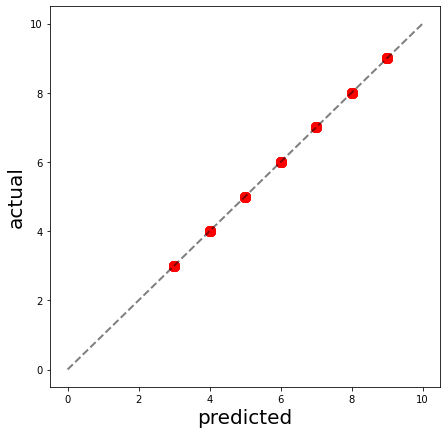

In [15]:
plt.figure(figsize=(7, 7))
actuals = train_label.flatten()
plt.plot([0, 10], [0, 10], color="k", linestyle="--", alpha=0.5, linewidth=2)
plt.scatter(preds, actuals, s=100, color="r")
plt.xlabel("predicted", fontsize=20)
plt.ylabel("actual", fontsize=20)

## On Unknown Data

In [16]:
out_of_sample_data = np.array(
    [[6, 7, 8], [7, 8, 9], [8, 9, 10], [9, 10, 11], [10, 11, 12]]
).reshape(5, 3, 1)

In [17]:
# make predictions using the model
preds = model.predict(out_of_sample_data).flatten()

1/1 [==============================] - 0s 127ms/step


In [18]:
# print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f"{example} -> {pred}")

[6 7 8] -> 8.999994277954102
[7 8 9] -> 9.999994277954102
[ 8  9 10] -> 10.999994277954102
[ 9 10 11] -> 11.999992370605469
[10 11 12] -> 12.999991416931152


# A Look Under the Hood

In [19]:
# input vector weights in RNN (U)
model.weights[0].numpy()

array([[1.2625641]], dtype=float32)

In [20]:
# recurrent state weights in RNN (V)
model.weights[1].numpy()

array([[-0.705033]], dtype=float32)

In [21]:
# bias term weights in RNN (b)
model.weights[2].numpy()

array([1.7234256], dtype=float32)

# So the model has learned that
## $y_t = 0.93x_t + 0.07y_{t-1} + 1$
## $y_t = 0.93x_t + 0.07x_t + 1$
## $y_t = x_t + 1$

# But ... this isn't that impressive

In [22]:
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

LinearRegression()

In [23]:
# make predictions using the linear model
n = out_of_sample_data.shape[0]
preds = clf.predict(out_of_sample_data.reshape(n, -1)).flatten()

In [24]:
# print some outputs
for i in range(len(preds)):
    example = out_of_sample_data[i].flatten()
    pred = preds[i]
    print(f"{example} -> {pred}")

[6 7 8] -> 9.0
[7 8 9] -> 10.0
[ 8  9 10] -> 11.0
[ 9 10 11] -> 11.999999999999998
[10 11 12] -> 13.0


---

# Harder Case

In [25]:
def sigmoid(v):
    return 1.0 / (1.0 + np.exp(-v))

In [26]:
sequence = np.sin(np.arange(0, 6 * 3.14159, 0.1))
sequence += np.random.normal(0, 0.05, len(sequence))

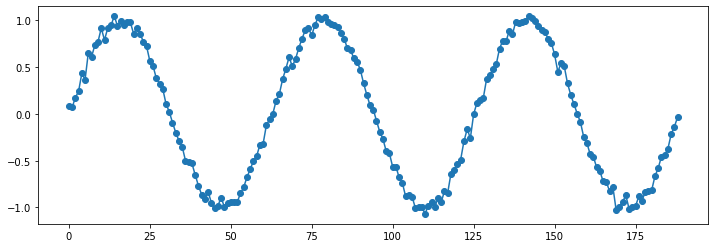

In [27]:
plt.figure(figsize=(12, 4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)

In [28]:
# generate training data
train_data = [
    np.array(sequence[i : i + window_size]).reshape(1, -1)
    for i in range(sequence.shape[0] - window_size)
]
train_data = np.concatenate(train_data * 10, axis=0)
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], 1)

In [29]:
# get training labels
train_label = [
    sequence[i + window_size] for i in range(sequence.shape[0] - window_size)
]
train_label = np.concatenate([train_label] * 10).reshape(-1, 1)

## Try a Linear Model

In [30]:
clf = LinearRegression()
clf.fit(train_data.reshape((train_data.shape[0], -1)), train_label.flatten())

LinearRegression()

In [31]:
# make predictions using the linear model
preds = []
input_vec = train_data[-1].copy()
for _ in range(15):
    pred = clf.predict(input_vec.reshape(1, -1)).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

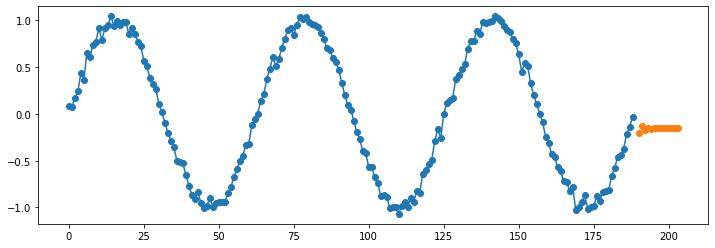

In [32]:
plt.figure(figsize=(12, 4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence) + 1, len(sequence) + 15), preds[1:])

## Train an RNN

In [33]:
# init model
model = Sequential()

# RNN
model.add(SimpleRNN(2, activation="tanh"))

# Dense layer
model.add(Dense(1))

# compile model
opt = Adam(learning_rate=0.1)
model.compile(loss="mean_squared_error", optimizer=opt, metrics=["mse"])

# train model
model.fit(train_data, train_label, epochs=25, verbose=1)

Epoch 1/25
59/59 [==============================] - 1s 2ms/step - loss: 0.0232 - mse: 0.0232
Epoch 2/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 3/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0071 - mse: 0.0071
Epoch 4/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073
Epoch 5/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0072 - mse: 0.0072
Epoch 6/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0077 - mse: 0.0077
Epoch 7/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0068 - mse: 0.0068
Epoch 8/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0082 - mse: 0.0082
Epoch 9/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0074 - mse: 0.0074
Epoch 10/25
59/59 [==============================] - 0s 2ms/step - loss: 0.0079 - mse: 0.0079
Epoch 11/25
59/59 [==============================] - 0s 2ms/step - lo

In [37]:
# make predictions using the rnn model
preds = []
input_vec = train_data[-1:].copy()
for _ in range(15):
    pred = model.predict(input_vec).flatten()
    preds.append(pred[0])
    input_vec[0][-1] = pred[0]

1/1 [==============================] - 0s 15ms/step


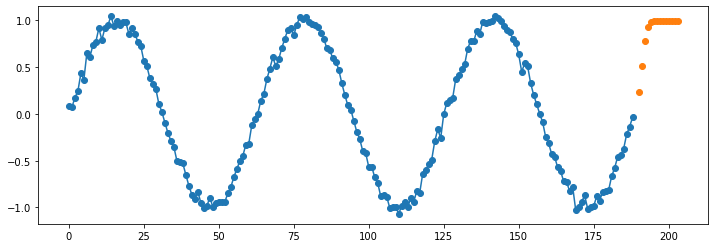

In [38]:
plt.figure(figsize=(12, 4))
plt.plot(sequence)
plt.scatter(range(len(sequence)), sequence)
plt.scatter(range(len(sequence) + 1, len(sequence) + 15), preds[1:])

---

# Application to NLP

## First cells copied from this tutorial: https://www.tensorflow.org/text/guide/word_embeddings

In [36]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(
    "aclImdb_v1.tar.gz", url, untar=True, cache_dir=".", cache_subdir=""
)

dataset_dir = os.path.join(os.path.dirname(dataset), "aclImdb")
os.listdir(dataset_dir)

84125825/84125825 [==============================] - 70s 1us/step


['imdb.vocab', 'imdbEr.txt', 'README', 'test', 'train']

In [40]:
train_dir = os.path.join(dataset_dir, "train")
os.listdir(train_dir)

['labeledBow.feat',
 'neg',
 'pos',
 'unsup',
 'unsupBow.feat',
 'urls_neg.txt',
 'urls_pos.txt',
 'urls_unsup.txt']

In [41]:
remove_dir = os.path.join(train_dir, "unsup")
shutil.rmtree(remove_dir)

In [42]:
batch_size = 1024
seed = 123
train_ds = tf.keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="training",
    seed=seed,
)
val_ds = tf.keras.utils.text_dataset_from_directory(
    "aclImdb/train",
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation",
    seed=seed,
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [43]:
for text_batch, label_batch in train_ds.take(1):
    for i in range(5):
        print(label_batch[i].numpy(), text_batch.numpy()[i])
        print()

0 b"Oh My God! Please, for the love of all that is holy, Do Not Watch This Movie! It it 82 minutes of my life I will never get back. Sure, I could have stopped watching half way through. But I thought it might get better. It Didn't. Anyone who actually enjoyed this movie is one seriously sick and twisted individual. No wonder us Australians/New Zealanders have a terrible reputation when it comes to making movies. Everything about this movie is horrible, from the acting to the editing. I don't even normally write reviews on here, but in this case I'll make an exception. I only wish someone had of warned me before I hired this catastrophe"

1 b'This movie is SOOOO funny!!! The acting is WONDERFUL, the Ramones are sexy, the jokes are subtle, and the plot is just what every high schooler dreams of doing to his/her school. I absolutely loved the soundtrack as well as the carefully placed cynicism. If you like monty python, You will love this film. This movie is a tad bit "grease"esk (withou

In [44]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [45]:
# Create a custom standardization function to strip HTML break tags '<br />'.
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(lowercase, "<br />", " ")
    return tf.strings.regex_replace(
        stripped_html, "[%s]" % re.escape(string.punctuation), ""
    )


# Vocabulary size and number of words in a sequence.
vocab_size = 10000
sequence_length = 100

# Use the text vectorization layer to normalize, split, and map strings to
# integers. Note that the layer uses the custom standardization defined above.
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=vocab_size,
    output_mode="int",
    output_sequence_length=sequence_length,
)

# Make a text-only dataset (no labels) and call adapt to build the vocabulary.
text_ds = train_ds.map(lambda x, y: x)
vectorize_layer.adapt(text_ds)

In [46]:
embedding_dim = 16

model = Sequential(
    [
        vectorize_layer,
        Embedding(vocab_size, embedding_dim, name="embedding"),
        SimpleRNN(8),
        Dense(1, activation="sigmoid"),
    ]
)

In [47]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

In [48]:
model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15


/home/masoud/anaconda3/envs/coding_env/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


20/20 [==============================] - 60s 3s/step - loss: 0.6951 - accuracy: 0.5084 - val_loss: 0.6914 - val_accuracy: 0.5274
Epoch 2/15
20/20 [==============================] - 2s 78ms/step - loss: 0.6688 - accuracy: 0.6273 - val_loss: 0.6838 - val_accuracy: 0.5650
Epoch 3/15
20/20 [==============================] - 1s 72ms/step - loss: 0.6320 - accuracy: 0.7092 - val_loss: 0.6670 - val_accuracy: 0.6104
Epoch 4/15
20/20 [==============================] - 1s 74ms/step - loss: 0.5780 - accuracy: 0.7811 - val_loss: 0.6448 - val_accuracy: 0.6440
Epoch 5/15
20/20 [==============================] - 1s 75ms/step - loss: 0.5306 - accuracy: 0.8266 - val_loss: 0.6259 - val_accuracy: 0.6646
Epoch 6/15
20/20 [==============================] - 2s 79ms/step - loss: 0.5091 - accuracy: 0.8255 - val_loss: 0.6351 - val_accuracy: 0.6502
Epoch 7/15
20/20 [==============================] - 2s 77ms/step - loss: 0.4619 - accuracy: 0.8597 - val_loss: 0.6303 - val_accuracy: 0.6544
Epoch 8/15
20/20 [=======

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 100)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 100, 16)           160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 160,209
Trainable params: 160,209
Non-trainable params: 0
_________________________________________________________________


In [51]:
while True:
    curr_input = input()
    if curr_input == "quit":
        break
    pred = model.predict([[curr_input]], verbose=False)[0][0]
    print(pred)
    print()

The movie was a great master piece
0.77639776

That was terrible
0.21766368



KeyboardInterrupt: Interrupted by user